In [1]:
from IPython.display import display

import pandas as pd

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
import numpy as np

## Create the clean data table

### Read Excel table

In [2]:
data = pd.read_excel("Wahl-O-Mat Bundestag 2021_Datensatz.xlsx", sheet_name=1, engine='openpyxl')
data

Partei: Nr. Partei: Kurzbezeichnung  \
0               1               CDU / CSU   
1               2                     SPD   
2               3                     AfD   
3               4                     FDP   
4               5               DIE LINKE   
...           ...                     ...   
1439           34                     LfK   
1440           35                     SSW   
1441           36         Team Todenhöfer   
1442           37             UNABHÄNGIGE   
1443           38                    Volt   

                                           Partei: Name  These: Nr.  \
0     Christlich Demokratische Union Deutschlands / ...           1   
1               Sozialdemokratische Partei Deutschlands           1   
2                           Alternative für Deutschland           1   
3                            Freie Demokratische Partei           1   
4                                             DIE LINKE           1   
...                                                 ...         ...   
1439    >> Partei für Kinder, Jugendliche und Familien           38   
1440                    Südschleswigscher Wählerverband          38   
1441         Team Todenhöfer – Die Gerechtigkeitspartei          38   
1442              UNABHÄNGIGE für bürgernahe Demokratie          38   
1443                                   Volt Deutschland          38   

                   These: Titel  \
0     Tempolimit auf Autobahnen   
1     Tempolimit auf Autobahnen   
2     Tempolimit auf Autobahnen   
3     Tempolimit auf Autobahnen   
4     Tempolimit auf Autobahnen   
...                         ...   
1439                 Homeoffice   
1440                 Homeoffice   
1441                 Homeoffice   
1442                 Homeoffice   
1443                 Homeoffice   

                                           These: These Position: Position  \
0     Auf allen Autobahnen soll ein generelles Tempo...    stimme nicht zu   
1     Auf allen Autobahnen soll ein generelles Tempo...          stimme zu   
2     Auf allen Autobahnen soll ein generelles Tempo...    stimme nicht zu   
3     Auf allen Autobahnen soll ein generelles Tempo...    stimme nicht zu   
4     Auf allen Autobahnen soll ein generelles Tempo...          stimme zu   
...                                                 ...                ...   
1439  Unternehmen sollen selbst entscheiden, ob sie ...    stimme nicht zu   
1440  Unternehmen sollen selbst entscheiden, ob sie ...          stimme zu   
1441  Unternehmen sollen selbst entscheiden, ob sie ...          stimme zu   
1442  Unternehmen sollen selbst entscheiden, ob sie ...            neutral   
1443  Unternehmen sollen selbst entscheiden, ob sie ...          stimme zu   

                                   Position: Begründung  
0     Wir lehnen ein generelles Tempolimit auf Autob...  
1     Ein Tempolimit von 130 km/h auf Bundesautobahn...  
2     Die AfD lehnt ein generelles Tempolimit auf Bu...  
3     Ein generelles Tempolimit auf Autobahnen führt...  
4     Deutschland ist das einzige Land in Europa und...  
...                                                 ...  
1439  Während einer Pandemie sollten für alle Bevölk...  
1440  Das Arbeiten im Homeoffice hat sich während de...  
1441  Unternehmen wissen selbst am besten, wo ihre M...  
1442  In Ausnahmefällen muss der Staat eingreifen kö...  
1443  Sollten Arbeitnehmende gerne ortsunabhängig ar...  

[1444 rows x 8 columns]

### Create table and define the numerical values

In [3]:
nquestions = data["These: Nr."].max()
nparties = data["Partei: Nr."].max()

party_opinion = pd.DataFrame(
    columns=["Patry ID", *map(lambda i: f"Question {i}", range(1, nquestions + 1))]
)

In [5]:
def position(word):
    if word == "stimme nicht zu":
        return -1
    elif word == "stimme zu":
        return 1
    elif word == "neutral":
        return 0
    else:
        raise ValueError(f"{word} not recognized!")

### Fill the clean data table from the xlsx table

In [6]:
for party in range(1, nparties + 1):
    opinions = []
    for question in range(1, nquestions + 1):
        row = data.loc[(data["Partei: Nr."] == party) & (data["These: Nr."] == question)]
        opinion = position(row["Position: Position"].values[0])
        opinions.append(opinion)
    party_opinion = party_opinion.append(pd.Series([party, *opinions], index=party_opinion.columns), ignore_index=True)
party_opinion

Patry ID Question 1 Question 2 Question 3 Question 4 Question 5 Question 6  \
0         1         -1          1         -1         -1          0          1   
1         2          1          1          1         -1          1          1   
2         3         -1          1         -1          1         -1          1   
3         4         -1          1          1          0         -1          1   
4         5          1         -1          1         -1          1         -1   
5         6          1         -1          1         -1          1         -1   
6         7         -1          1         -1         -1         -1          1   
7         8          1         -1          1         -1          1         -1   
8         9          1         -1          1         -1          1         -1   
9        10         -1          1         -1          1          0         -1   
10       11         -1         -1          1         -1          1         -1   
11       12          1         -1          1         -1          1         -1   
12       13          1         -1          1         -1          1         -1   
13       14          1         -1          1         -1          1         -1   
14       15         -1          1         -1          0         -1          1   
15       16          0         -1          1         -1          1          0   
16       17          1         -1          1         -1          1         -1   
17       18          0          0          0          0          0          0   
18       19          1         -1          0          1          1         -1   
19       20          1         -1          1         -1          1         -1   
20       21         -1          0         -1          0          1          0   
21       22         -1         -1         -1          1          1         -1   
22       23          0         -1          1         -1          0          1   
23       24          1         -1          1         -1          1         -1   
24       25          1         -1          1         -1          1         -1   
25       26          0          1         -1          0          1         -1   
26       27          1          1         -1          1         -1          1   
27       28          0          0         -1         -1         -1          1   
28       29          0          1         -1          1          1         -1   
29       30         -1         -1         -1          1         -1         -1   
30       31          1          1          1          1          1          1   
31       32         -1          1         -1          1         -1          1   
32       33         -1          1          0         -1          0         -1   
33       34          1         -1          1          0          0         -1   
34       35          1          0          1         -1          1          0   
35       36         -1         -1          0         -1         -1         -1   
36       37         -1          0          0          1          1          0   
37       38          1         -1          1         -1          1         -1   

   Question 7 Question 8 Question 9  ... Question 29 Question 30 Question 31  \
0          -1         -1         -1  ...           1           1           0   
1           1          1         -1  ...          -1           1           1   
2          -1          1          1  ...           0           1          -1   
3           0         -1          0  ...          -1           1          -1   
4           1          1         -1  ...          -1          -1           1   
5           1          1         -1  ...          -1           0           1   
6          -1         -1         -1  ...           0           1           0   
7           1          1         -1  ...          -1           1           1   
8           1          1         -1  ...          -1           1           1   
9          -1          1          1  ...   

### Create an ID: party and ID: question dictionaries

In [7]:
party_colors = {
    "CDU / CSU": "#000000",
    "SPD": "#E3000F",
    "AfD": "#009EE0",
    "FDP": "#FFFF00",
    "DIE LINKE": "#BE3075",
    "GRÜNE": "#46962B",
    'FREIE WÄHLER': "#FF8000",
    'Die PARTEI': "#B5152B",
} # As on https://de.wikipedia.org/wiki/Bundestagswahl_2021
party_results = {
    "CDU / CSU": 18.9 + 5.2,
    "SPD": 25.7,
    "AfD": 10.3,
    "FDP": 11.5,
    "DIE LINKE": 4.9,
    "GRÜNE": 14.8,
    'FREIE WÄHLER': 2.4,
    'Die PARTEI': 1.0,
} # https://www.bundeswahlleiter.de/bundestagswahlen/2021/ergebnisse/bund-99.html Zweitstimmen 07.11.2021
party_id = {}
for party in range(1, nparties + 1):
    party_id[party] = data.loc[data["Partei: Nr."] == party]["Partei: Kurzbezeichnung"].values[0]
display(party_id)

question_id = {}
for question in range(1, nquestions + 1):
    question_id[question] = data.loc[data["These: Nr."] == question]["These: These"].values[0]
display(question_id)

{1: 'CDU / CSU',
 2: 'SPD',
 3: 'AfD',
 4: 'FDP',
 5: 'DIE LINKE',
 6: 'GRÜNE',
 7: 'FREIE WÄHLER',
 8: 'Die PARTEI',
 9: 'Tierschutzpartei',
 10: 'NPD',
 11: 'PIRATEN',
 12: 'ÖDP',
 13: 'V-Partei³',
 14: 'DiB',
 15: 'BP',
 16: 'Tierschutzallianz',
 17: 'MLPD',
 18: 'Gesundheitsforschung',
 19: 'MENSCHLICHE WELT',
 20: 'DKP',
 21: 'Die Grauen',
 22: 'BüSo',
 23: 'Die Humanisten',
 24: 'du.',
 25: 'SGP',
 26: 'dieBasis',
 27: 'Bündnis C',
 28: 'BÜRGERBEWEGUNG',
 29: 'III. Weg',
 30: 'BÜNDNIS21',
 31: 'LIEBE',
 32: 'LKR',
 33: 'PdF',
 34: 'LfK',
 35: 'SSW',
 36: 'Team Todenhöfer',
 37: 'UNABHÄNGIGE',
 38: 'Volt'}

{1: 'Auf allen Autobahnen soll ein generelles Tempolimit gelten.',
 2: 'Deutschland soll seine Verteidigungsausgaben erhöhen.',
 3: 'Bei Bundestagswahlen sollen auch Jugendliche ab 16 Jahren wählen dürfen.',
 4: 'Die Förderung von Windenergie soll beendet werden.',
 5: 'Die Möglichkeiten der Vermieterinnen und Vermieter, Wohnungsmieten zu erhöhen, sollen gesetzlich stärker begrenzt werden.',
 6: 'Impfstoffe gegen Covid-19 sollen weiterhin durch Patente geschützt sein.',
 7: 'Der für das Jahr 2038 geplante Ausstieg aus der Kohleverstromung soll vorgezogen werden.',
 8: 'Alle Erwerbstätigen sollen in der gesetzlichen Rentenversicherung versichert sein müssen.',
 9: 'Das Recht anerkannter Flüchtlinge auf Familiennachzug soll abgeschafft werden.',
 10: 'Auf den Umsatz, der in Deutschland mit digitalen Dienstleistungen erzielt wird, soll eine nationale Steuer erhoben werden.',
 11: 'Die traditionelle Familie aus Vater, Mutter und Kindern soll stärker als andere Lebensgemeinschaften geförder

## 2D principal component analysis

Each party gets a coordinate in 2D space

In [8]:
n_components = 5
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(party_opinion[party_opinion.columns[1:]])
df_reduced = pd.DataFrame(index=party_id.keys())
df_reduced["Name"] = party_id.values()
for component in range(1, n_components + 1):
    df_reduced[f"Principal component {component}"] = reduced[:,component - 1]

df_reduced["Color"] = df_reduced["Name"].map(lambda name: party_colors.get(name, 'w'))
df_reduced["Result"] = df_reduced["Name"].map(lambda name: party_results.get(name, 1))


df_reduced

Name  Principal component 1  Principal component 2  \
1              CDU / CSU               4.170723               2.800281   
2                    SPD              -1.518475               1.618661   
3                    AfD               5.987569               0.212071   
4                    FDP               2.463854               4.072368   
5              DIE LINKE              -4.452607              -0.729708   
6                  GRÜNE              -4.162465               0.826182   
7           FREIE WÄHLER               2.777722               2.652483   
8             Die PARTEI              -3.793851               0.378536   
9       Tierschutzpartei              -3.865111               0.755495   
10                   NPD               3.388726              -3.615496   
11               PIRATEN              -1.713717               0.968971   
12                   ÖDP              -3.265931              -0.282847   
13             V-Partei³              -3.697896               0.624304   
14                   DiB              -3.915284              -0.122652   
15                    BP               4.758122               0.666916   
16     Tierschutzallianz              -1.506756              -0.420893   
17                  MLPD              -2.931144              -1.032738   
18  Gesundheitsforschung               0.999151               0.230316   
19      MENSCHLICHE WELT               0.512515              -2.745653   
20                   DKP              -3.146173              -1.652491   
21            Die Grauen               1.553342              -1.472853   
22                  BüSo               2.841884              -1.932650   
23        Die Humanisten              -0.691133               2.377036   
24                   du.              -4.188590              -0.742607   
25                   SGP              -3.146627              -1.111902   
26              dieBasis               2.032953              -2.350505   
27             Bündnis C               4.275233               0.993875   
28        BÜRGERBEWEGUNG               2.094525              -0.700842   
29              III. Weg               3.355576              -3.779291   
30             BÜNDNIS21               3.383785              -0.457103   
31                 LIEBE               1.448234               1.019230   
32                   LKR               4.801354               0.838580   
33                   PdF              -0.065455               1.899221   
34                   LfK              -1.812391              -0.420913   
35                   SSW              -2.047281               0.625336   
36       Team Todenhöfer               0.629112               1.434279   
37           UNABHÄNGIGE               2.048411              -1.988377   
38                  Volt              -3.601906               0.565379   

    Principal component 3  Principal component 4  Principal component 5  \
1                1.405937               0.432606               0.011044   
2                1.168340               1.832624              -1.413218   
3                0.822331              -0.162619               0.406914   
4               -0.187598               0.115646               1.017529   
5                0.424026              -0.278591               0.554298   
6                1.093790               1.401292               1.239616   
7               -1.613681               0.238919              -0.120646   
8                0.089148               0.766063              -0.036933   
9                0.598598              -0.222615              -0.461858   
10              -1.474201               0.335097               1.229283   
11              -1.412043              -0.656823              -1.563379   
12               0.639007               0.008583               2.077972   
13              -0.583569               0.180259              -0.050783   
14              -0.602602               0.571271               0.330194   
15      

In [9]:
print("Explained variance: ", pca.explained_variance_ratio_)
contributions = 10

comp_i = 0
for comp_i in range(pca.n_components_):
    important_indices = np.argsort(np.abs(pca.components_[comp_i]))[::-1][:contributions]
    print("----------------------------")
    print("PCA component: ", comp_i + 1)
    # print(important_indices)
    # print(pca.components_[comp_i][important_indices])
    for question in important_indices + 1:
        print("%5i" % question, "%5.2f" % pca.components_[comp_i][question - 1], question_id[question])

variance = pca.components_[comp_i][np.argsort(np.abs(pca.components_[comp_i]))][::-1][:contributions]

Explained variance:  [0.36846221 0.10840426 0.06578037 0.05885194 0.04916925]
----------------------------
PCA component:  1
   19  0.26 Die Zulassung von neuen Autos mit Verbrennungsmotor soll auch langfristig möglich sein.
    3 -0.25 Bei Bundestagswahlen sollen auch Jugendliche ab 16 Jahren wählen dürfen.
   14 -0.23 In Deutschland soll es generell möglich sein, neben der deutschen eine zweite Staatsbürgerschaft zu haben.
   35  0.23 Asyl soll weiterhin nur politisch Verfolgten gewährt werden.
    7 -0.22 Der für das Jahr 2038 geplante Ausstieg aus der Kohleverstromung soll vorgezogen werden.
    2  0.22 Deutschland soll seine Verteidigungsausgaben erhöhen.
    1 -0.22 Auf allen Autobahnen soll ein generelles Tempolimit gelten.
   38  0.21 Unternehmen sollen selbst entscheiden, ob sie ihren Beschäftigten das Arbeiten im Homeoffice erlauben.
   15 -0.21 Bundesbehörden sollen in ihren Veröffentlichungen unterschiedliche Geschlechtsidentitäten sprachlich berücksichtigen.
   32 -0.20 Is

### Visualization

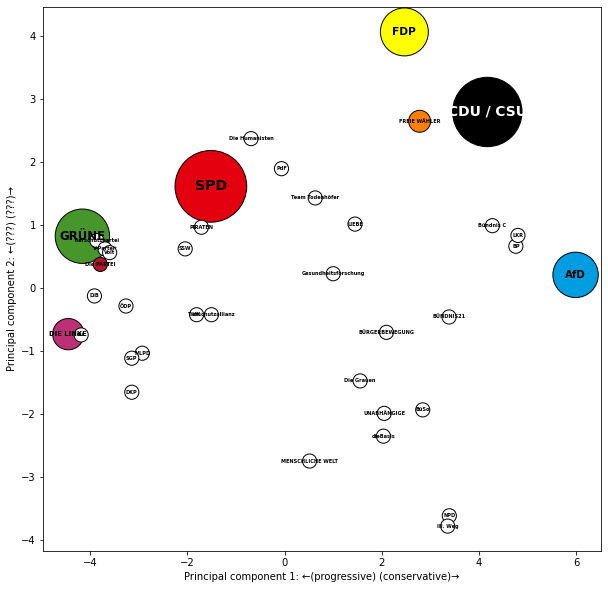

In [10]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.set_xlabel("Principal component 1: ←(progressive) (conservative)→")
ax.set_ylabel("Principal component 2: ←(???) (???)→")
ax.scatter(
    df_reduced["Principal component 1"],
    df_reduced["Principal component 2"],
    c=df_reduced["Color"],
    s=200*df_reduced["Result"],
    edgecolors="k"
)

for i, entry in df_reduced.iterrows():
    if pd.isnull(entry["Result"]): continue
    ax.annotate(
        entry["Name"],
        (entry["Principal component 1"], entry["Principal component 2"]),
        ha="center", va="center",
        size=max(10*np.log10(entry["Result"]), 5),
        color="k" if entry["Name"] != "CDU / CSU" else "w",
        fontweight=700
    )

fig.savefig("Wahlomat.pdf")
fig.savefig("Wahlomat.png", dpi=600)
